In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = (r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data = pd.read_csv(file_path)

# Ver las primeras filas del dataset
data.head()


,temporada,torneo,posicion,club,jj,jg,je,jp,gf,gc,...,dif2,pts2,jj3,jg3,je3,jp3,gf3,gc3,dif3,pts3
0,2019-2020,Apertura,19,Necaxa,18,1,3,14,6,35,...,-9,5,9,0,1,8,0,20,-20,1
1,2022-2023,Apertura,9,Pumas,17,7,3,7,30,36,...,9,14,9,3,1,5,12,27,-15,10
2,2018-2019,Apertura,1,Tigres,16,12,4,0,51,19,...,17,18,8,7,1,0,26,11,15,22
3,2018-2019,Apertura,2,Pachuca,16,12,2,2,31,14,...,10,21,8,5,2,1,16,9,7,17
4,2018-2019,Apertura,3,América,16,11,2,3,28,12,...,7,18,8,5,2,1,15,6,9,17


In [3]:
# Crear la variable objetivo "rank_group"
def categorize_position(pos):
    if pos <= 4:
        return "Top"
    elif pos <= 12:
        return "Mid"
    else:
        return "Bottom"

# Aplicar la función al dataset
data["rank_group"] = data["posicion"].apply(categorize_position)

# Seleccionar características relevantes
features = ["jg", "je", "jp", "gf", "gc", "dif", "pts"]
X = data[features]
y = data["rank_group"]

# Codificar la variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predicciones
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
accuracy, classification_rep, conf_matrix


(0.7592592592592593,
 '              precision    recall  f1-score   support\n\n      Bottom       0.74      0.78      0.76        18\n         Mid       0.74      0.71      0.72        24\n         Top       0.83      0.83      0.83        12\n\n    accuracy                           0.76        54\n   macro avg       0.77      0.77      0.77        54\nweighted avg       0.76      0.76      0.76        54\n',
 array([[14,  4,  0],
        [ 5, 17,  2],
        [ 0,  2, 10]], dtype=int64))

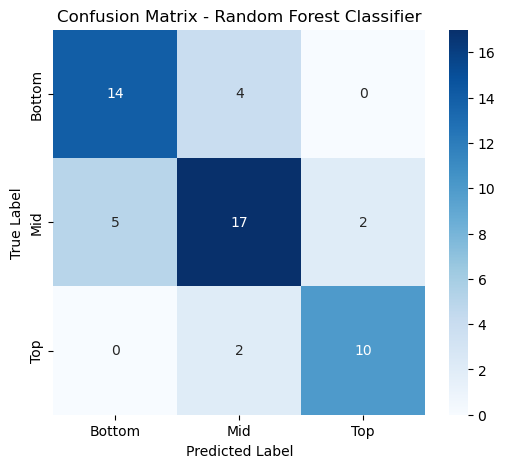

In [5]:
# Reintentar visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


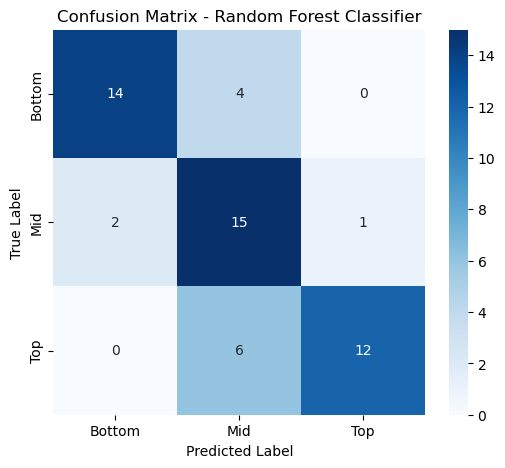

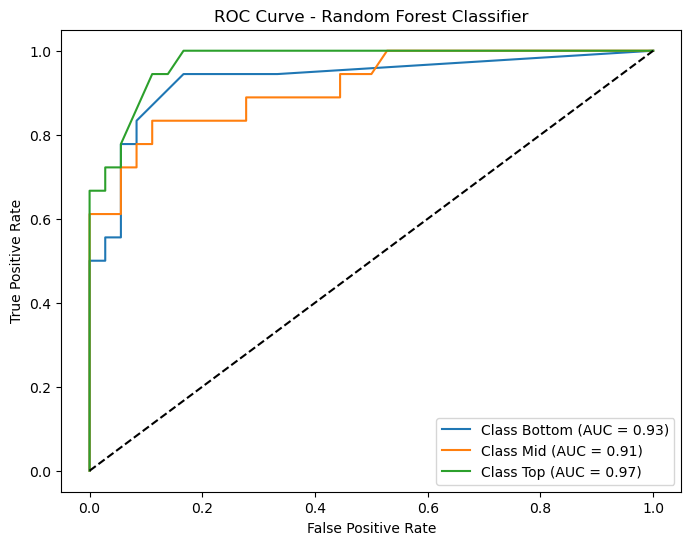

C:\Users\ShePlay\AppData\Local\Temp\ipykernel_8428\3320822401.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


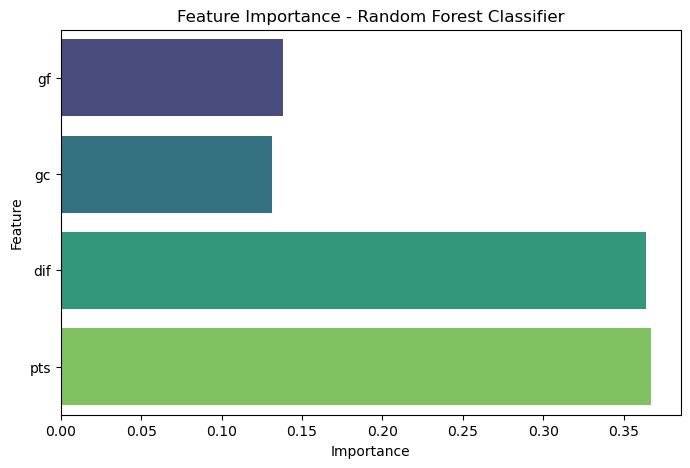

C:\Users\ShePlay\AppData\Local\Temp\ipykernel_8428\3320822401.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="coolwarm")


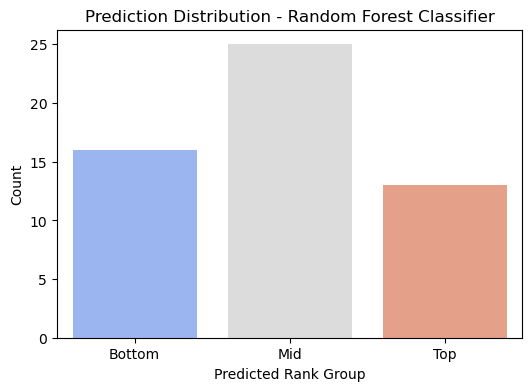

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Cargar el dataset
file_path = (r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data = pd.read_csv(file_path)

# Filtrar columnas relevantes para la clasificación
features = ["gf", "gc", "dif", "pts"]  # Variables más influyentes en el rendimiento
target = "posicion"  # Usamos la posición como variable a predecir

# Eliminar valores nulos
data = data.dropna(subset=features + [target])

# Convertir la posición en clases (Top, Mid, Bottom)
data["rank_group"] = pd.qcut(data["posicion"], q=3, labels=["Top", "Mid", "Bottom"])

# Codificar etiquetas
label_encoder = LabelEncoder()
data["rank_group"] = label_encoder.fit_transform(data["rank_group"])

# Separar en características y variable objetivo
X = data[features]
y = data["rank_group"]

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# -------------------- 1. Matriz de Confusión --------------------
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# -------------------- 2. Curva ROC y AUC --------------------
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.show()

# -------------------- 3. Importancia de Características --------------------
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Classifier")
plt.show()

# -------------------- 4. Distribución de Predicciones --------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette="coolwarm")
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.xlabel("Predicted Rank Group")
plt.ylabel("Count")
plt.title("Prediction Distribution - Random Forest Classifier")
plt.show()
